In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('Thyroid_Diff.csv')

print(f"Shape dataset: {df.shape}")
print(f"Jumlah record: {len(df)}")
print(f"Jumlah attribute: {len(df.columns)}")

Shape dataset: (383, 17)
Jumlah record: 383
Jumlah attribute: 17


In [3]:
print("5 Data Teratas dari Dataset Thyroid_Diff.csv:")
print("=" * 120)
print(df.head())

5 Data Teratas dari Dataset Thyroid_Diff.csv:
   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0   

## **Statistik Deskriptif untuk Attribute Bertipe Angka**

In [4]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"Attribute numerik: {list(numeric_columns)}")

if len(numeric_columns) > 0:
    stats = df[numeric_columns].describe()
    stats.loc['Q1'] = df[numeric_columns].quantile(0.25)
    stats.loc['Q2'] = df[numeric_columns].quantile(0.50)
    stats.loc['Q3'] = df[numeric_columns].quantile(0.75)
    stats.loc['std'] = df[numeric_columns].std()
    stats.loc['variance'] = df[numeric_columns].var()
    stats.loc['skewness'] = df[numeric_columns].skew()

    stats = stats.reindex(['count', 'mean', 'std', 'variance', 'skewness', 'min', 'Q1', 'Q2', 'Q3', 'max'])
    print(stats.round(2))
else:
    print("Tidak ada attribute numerik")

Attribute numerik: ['Age']
             Age
count     383.00
mean       40.87
std        15.13
variance  229.05
skewness    0.72
min        15.00
Q1         29.00
Q2         37.00
Q3         51.00
max        82.00


## **10 Record Pertama dengan Attribute Bertipe Angka**

In [5]:
print("10 Record Pertama dengan Atribut Numerik:")
print("=" * 50)
print(df[['Age']].head(10))

10 Record Pertama dengan Atribut Numerik:
   Age
0   27
1   34
2   30
3   62
4   62
5   52
6   41
7   46
8   51
9   40


## **Informasi Dataset**

In [6]:
print("INFORMASI DATASET THYROID_DIFF.CSV")
print("=" * 50)

# jumlah record dan attribute
print(f"Jumlah Record (Baris): {df.shape[0]}")
print(f"Jumlah Attribute (Kolom): {df.shape[1]}")
print()

# nama attribute
print("Nama Attribute:")
print("-" * 20)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
print()

# jumlah attribute dengan tipe angka
numeric_columns = df.select_dtypes(include=['number']).columns
print(f"Jumlah Attribute dengan Tipe Angka: {len(numeric_columns)}")
print("Attribute Numerik:")
print("-" * 20)
for col in numeric_columns:
    print(f"- {col} (tipe: {df[col].dtype})")
print()

# tipe data semua attribute
print("Tipe Data Semua Attribute:")
print("-" * 30)
print(df.dtypes)

INFORMASI DATASET THYROID_DIFF.CSV
Jumlah Record (Baris): 383
Jumlah Attribute (Kolom): 17

Nama Attribute:
--------------------
 1. Age
 2. Gender
 3. Smoking
 4. Hx Smoking
 5. Hx Radiothreapy
 6. Thyroid Function
 7. Physical Examination
 8. Adenopathy
 9. Pathology
10. Focality
11. Risk
12. T
13. N
14. M
15. Stage
16. Response
17. Recurred

Jumlah Attribute dengan Tipe Angka: 1
Attribute Numerik:
--------------------
- Age (tipe: int64)

Tipe Data Semua Attribute:
------------------------------
Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object


## **Jumlah Label untuk Attribute Object**

In [7]:
print("JUMLAH LABEL UNTUK ATTRIBUTE BERTIPE OBJECT")
print("=" * 60)

# filter kolom dengan tipe object
object_columns = df.select_dtypes(include=['object']).columns

# tampilkan jumlah label untuk setiap attribute object
for col in object_columns:
    unique_count = df[col].nunique()
    unique_values = df[col].unique()
    print(f"\n{col}:")
    print(f"  Jumlah Label: {unique_count}")
    print(f"  Nilai Unik: {list(unique_values)}")

JUMLAH LABEL UNTUK ATTRIBUTE BERTIPE OBJECT

Gender:
  Jumlah Label: 2
  Nilai Unik: ['F', 'M']

Smoking:
  Jumlah Label: 2
  Nilai Unik: ['No', 'Yes']

Hx Smoking:
  Jumlah Label: 2
  Nilai Unik: ['No', 'Yes']

Hx Radiothreapy:
  Jumlah Label: 2
  Nilai Unik: ['No', 'Yes']

Thyroid Function:
  Jumlah Label: 5
  Nilai Unik: ['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism']

Physical Examination:
  Jumlah Label: 5
  Nilai Unik: ['Single nodular goiter-left', 'Multinodular goiter', 'Single nodular goiter-right', 'Normal', 'Diffuse goiter']

Adenopathy:
  Jumlah Label: 6
  Nilai Unik: ['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior']

Pathology:
  Jumlah Label: 4
  Nilai Unik: ['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell']

Focality:
  Jumlah Label: 2
  Nilai Unik: ['Uni-Focal', 'Multi-Focal']

Risk:
  Jumlah Label: 3
  Nilai Unik: ['Low', 'Intermediate', 'High']

T:
  Jumlah Label:

## **Visualisasi Dataset**

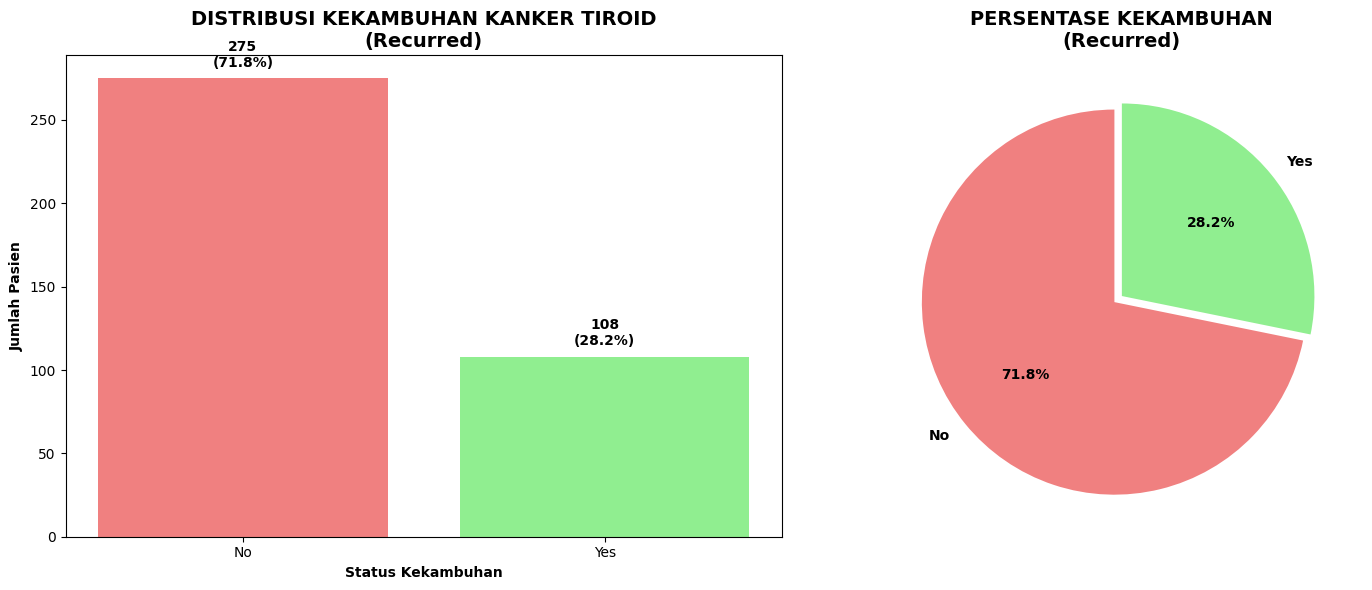

<Figure size 1200x600 with 0 Axes>

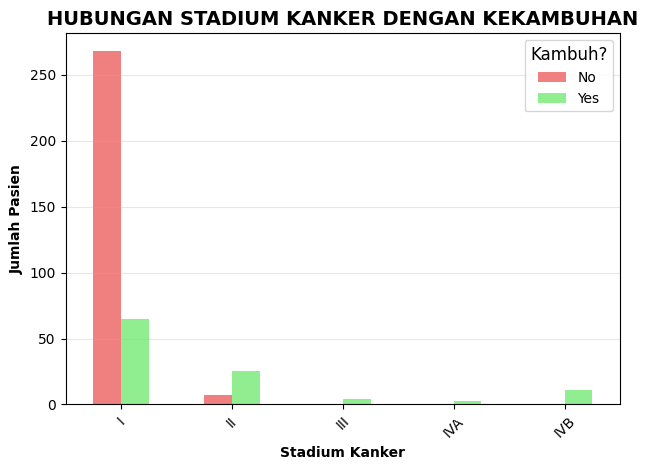

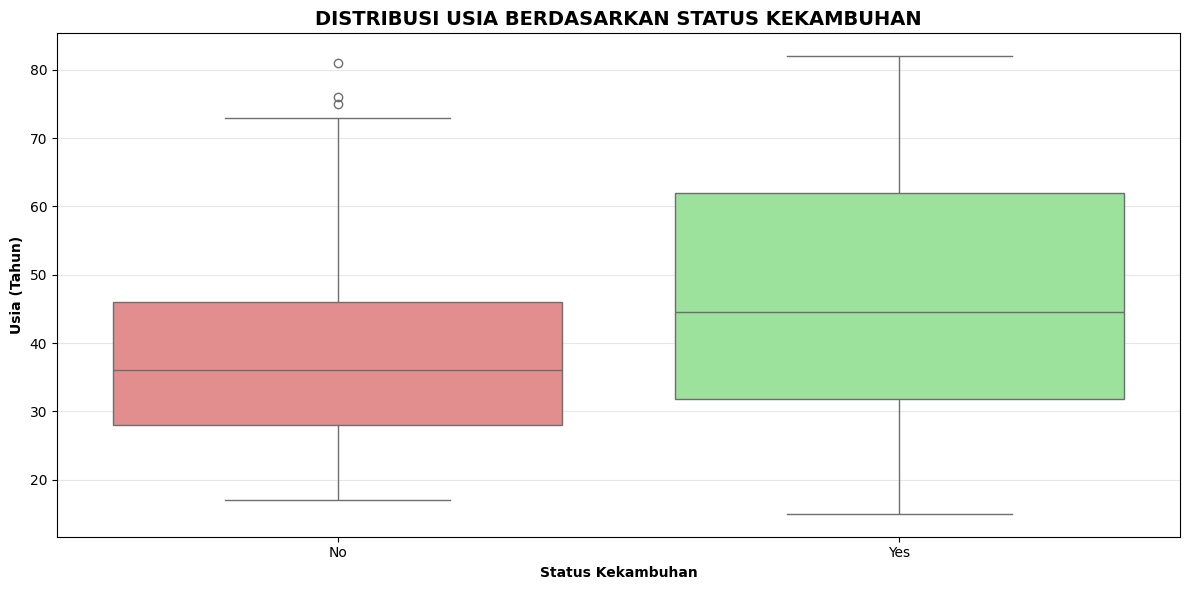


ANALISIS KEKAMBUHAN KANKER TIROID - STATISTIKA
Total Pasien: 383
Pasien Tidak Kambuh: 275 (71.8%)
Pasien Kambuh: 108 (28.2%)
Rasio Kekambuhan: 1:2

Distribusi Kekambuhan berdasarkan Stadium:
Recurred     No   Yes  Total  Persentase_Kambuh
Stage                                          
I         268.0  65.0  333.0               19.5
II          7.0  25.0   32.0               78.1
III         0.0   4.0    4.0              100.0
IVA         0.0   3.0    3.0              100.0
IVB         0.0  11.0   11.0              100.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

# visualisasi 1: distribusi kekambuhan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# bar chart - distribusi kekambuhan
recurred_counts = df['Recurred'].value_counts()
bars = ax1.bar(recurred_counts.index, recurred_counts.values, color=['lightcoral', 'lightgreen'])
ax1.set_title('DISTRIBUSI KEKAMBUHAN KANKER TIROID\n(Recurred)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Status Kekambuhan', fontweight='bold')
ax1.set_ylabel('Jumlah Pasien', fontweight='bold')

for bar, count in zip(bars, recurred_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{count}\n({count/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# pie chart - persentase kekambuhan
colors = ['lightcoral', 'lightgreen']
explode = (0.05, 0)
ax2.pie(recurred_counts.values, labels=recurred_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, startangle=90, textprops={'fontweight': 'bold'})
ax2.set_title('PERSENTASE KEKAMBUHAN\n(Recurred)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# visualisasi 2: hubungan stage dengan kekambuhan
plt.figure(figsize=(12, 6))
stage_recurred = pd.crosstab(df['Stage'], df['Recurred'])
stage_recurred.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('HUBUNGAN STADIUM KANKER DENGAN KEKAMBUHAN', fontsize=14, fontweight='bold')
plt.xlabel('Stadium Kanker', fontweight='bold')
plt.ylabel('Jumlah Pasien', fontweight='bold')
plt.legend(title='Kambuh?', title_fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# visualisasi 3: distribusi usia berdasarkan kekambuhan
plt.figure(figsize=(12, 6))
sns.boxplot(x='Recurred', y='Age', data=df, palette=['lightcoral', 'lightgreen'])
plt.title('DISTRIBUSI USIA BERDASARKAN STATUS KEKAMBUHAN', fontsize=14, fontweight='bold')
plt.xlabel('Status Kekambuhan', fontweight='bold')
plt.ylabel('Usia (Tahun)', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# tampilkan statistik tambahan
print("\n" + "="*60)
print("ANALISIS KEKAMBUHAN KANKER TIROID - STATISTIKA")
print("="*60)
print(f"Total Pasien: {len(df)}")
print(f"Pasien Tidak Kambuh: {recurred_counts['No']} ({recurred_counts['No']/len(df)*100:.1f}%)")
print(f"Pasien Kambuh: {recurred_counts['Yes']} ({recurred_counts['Yes']/len(df)*100:.1f}%)")
print(f"Rasio Kekambuhan: 1:{recurred_counts['No']//recurred_counts['Yes']}")

# analisis berdasarkan stage
print("\nDistribusi Kekambuhan berdasarkan Stadium:")
stage_analysis = df.groupby('Stage')['Recurred'].value_counts().unstack().fillna(0)
stage_analysis['Total'] = stage_analysis.sum(axis=1)
stage_analysis['Persentase_Kambuh'] = (stage_analysis['Yes'] / stage_analysis['Total'] * 100).round(1)
print(stage_analysis)

## **Heatmap**

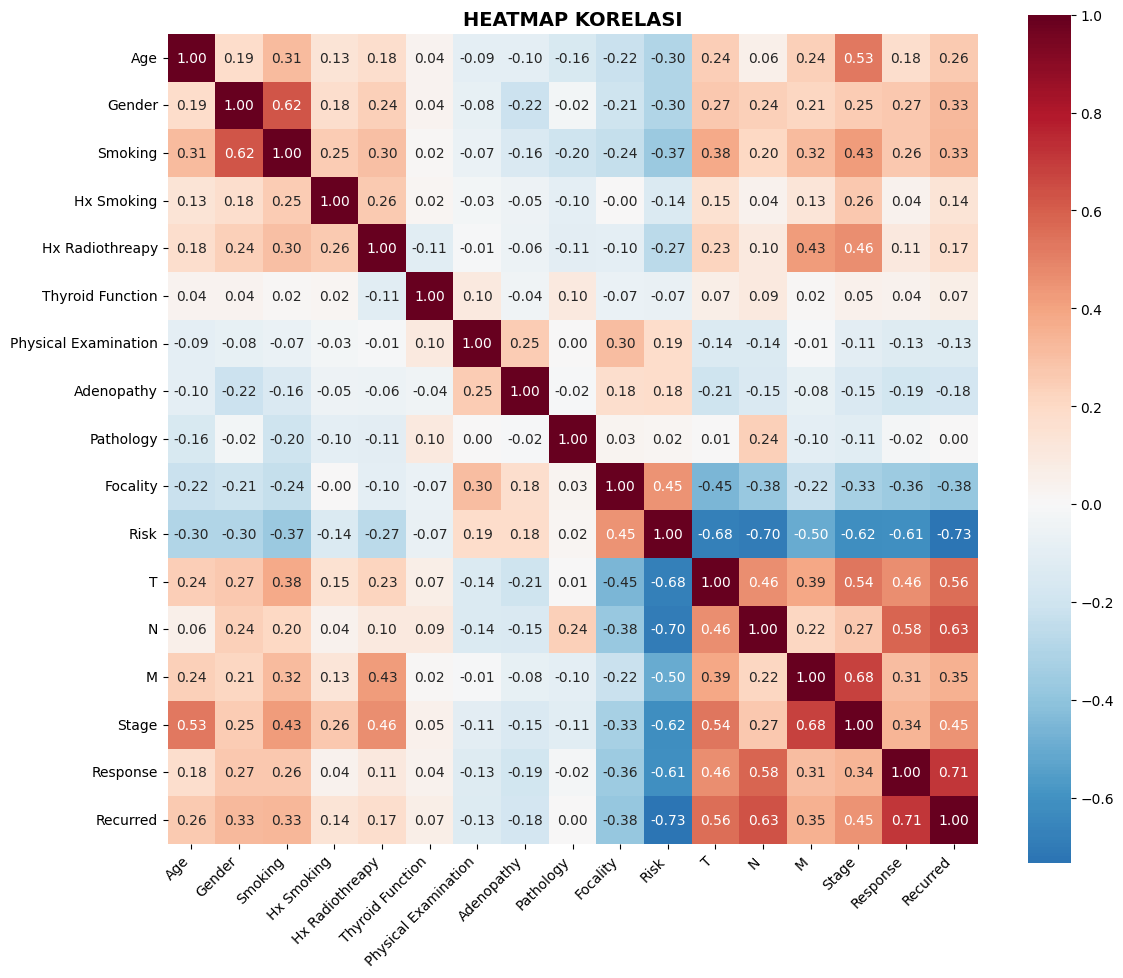


KORELASI TERHADAP VARIABEL TARGET (Recurred)
Korelasi dengan Recurred (Descending):
Response             : +0.709
N                    : +0.632
T                    : +0.556
Stage                : +0.449
M                    : +0.354
Smoking              : +0.333
Gender               : +0.328
Age                  : +0.259
Hx Radiothreapy      : +0.174
Hx Smoking           : +0.136
Thyroid Function     : +0.068
Pathology            : +0.003
Physical Examination : -0.132
Adenopathy           : -0.183
Focality             : -0.384
Risk                 : -0.733

VARIABEL DENGAN KORELASI KUAT (|r| > 0.3)
Response             : +0.709 (SANGAT KUAT POSITIF)
N                    : +0.632 (SANGAT KUAT POSITIF)
T                    : +0.556 (SANGAT KUAT POSITIF)
Stage                : +0.449 (KUAT POSITIF)
M                    : +0.354 (KUAT POSITIF)
Smoking              : +0.333 (KUAT POSITIF)
Gender               : +0.328 (KUAT POSITIF)
Focality             : -0.384 (KUAT NEGATIF)
Risk       

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_corr = df.copy()

# encoding variabel kategorikal untuk korelasi
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode semua variabel kategorikal
categorical_columns = df_corr.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# hitung matriks korelasi
correlation_matrix = df_corr.corr()

# buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
           annot=True,
           cmap='RdBu_r',
           center=0,
           fmt='.2f',
           square=True)
plt.title('HEATMAP KORELASI', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# tampilkan korelasi tertinggi dengan target (Recurred)
print("\n" + "="*70)
print("KORELASI TERHADAP VARIABEL TARGET (Recurred)")
print("="*70)

recurred_corr = correlation_matrix['Recurred'].sort_values(ascending=False)
print("Korelasi dengan Recurred (Descending):")
for feature, corr in recurred_corr.items():
    if feature != 'Recurred':
        print(f"{feature:20} : {corr:+.3f}")

# highlight korelasi kuat
print("\n" + "="*50)
print("VARIABEL DENGAN KORELASI KUAT (|r| > 0.3)")
print("="*50)
strong_corr = recurred_corr[(abs(recurred_corr) > 0.3) & (recurred_corr.index != 'Recurred')]
for feature, corr in strong_corr.items():
    strength = "SANGAT KUAT" if abs(corr) > 0.5 else "KUAT"
    direction = "POSITIF" if corr > 0 else "NEGATIF"
    print(f"{feature:20} : {corr:+.3f} ({strength} {direction})")

# analisis korelasi antar feature
print("\n" + "="*50)
print("KORELASI ANTAR FEATURE TERKUAT")
print("="*50)
# cari korelasi tinggi antar feature (bukan dengan diri sendiri)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.6:  # Threshold untuk korelasi kuat
            high_corr_pairs.append((correlation_matrix.columns[i],
                                  correlation_matrix.columns[j],
                                  corr_val))

# urutkan berdasarkan absolute korelasi
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for feat1, feat2, corr in high_corr_pairs[:10]:  # top 10
    print(f"{feat1:15} <-> {feat2:15} : {corr:+.3f}")

# Kesimpulan Analisis Dataset Prediksi Kekambuhan Kanker Tiroid

## **Gambaran Umum Dataset**
- **Jumlah Data**: 383 record pasien kanker tiroid
- **Variabel**: 16 fitur (1 numerik, 15 kategorikal)
- **Variabel Target**: *Recurred* (Status Kekambuhan)
- **Distribusi Kelas**:
  - **Tidak Kambuh**: 275 pasien (71.8%)
  - **Kambuh**: 108 pasien (28.2%)
  - **Ratio**: 1:2 (setiap 1 pasien kambuh, 2 pasien tidak kambuh)

## **Hasil Analisis Statistik**
### **Variabel Numerik (Age)**:
- **Rata-rata Usia**: 40.87 tahun
- **Standar Deviasi**: 15.13 tahun
- **Rentang Usia**: 15-82 tahun
- **Distribusi**: Miring ke kanan (skewness = 0.72)
- **Kuartil**: Q1=29 tahun, Q2=37 tahun, Q3=51 tahun

### **Variabel Kategorikal**:
- **16 variabel** dengan jumlah kategori bervariasi (2-7 kategori)
- **Variabel biner**: Gender, Smoking, Hx Smoking, Hx Radiothreapy, M, Recurred

## **Prediktor Kekambuhan Berdasarkan Analisis Korelasi**
### **Prediktor Terkuat (Korelasi > 0.5)**:
1. **`Response`** (+0.709) - Respons terhadap pengobatan
2. **`N`** (+0.632) - Status penyebaran nodal
3. **`T`** (+0.556) - Klasifikasi ukuran tumor

### **Prediktor Menengah (Korelasi 0.3-0.5)**:
4. **`Stage`** (+0.449) - Stadium kanker
5. **`M`** (+0.354) - Status metastasis
6. **`Smoking`** (+0.333) - Kebiasaan merokok
7. **`Gender`** (+0.328) - Jenis kelamin

### **Temuan Tidak Terduga**:
- **`Risk`** (-0.733) - Korelasi negatif kuat (perlu investigasi)
- **`Focality`** (-0.384) - Tumor multifokal justru kurang kambuh

## **Pola Berdasarkan Stadium**
| Stadium | Total Pasien | % Kambuh | Keterangan |
|---------|-------------|----------|------------|
| **I** | 333 | 19.5% | Mayoritas tidak kambuh |
| **II** | 32 | 78.1% | Lonjakan drastis |
| **III** | 4 | 100% | Semua kambuh |
| **IVA** | 3 | 100% | Semua kambuh |
| **IVB** | 11 | 100% | Semua kambuh |


# **Data Pre Processing**

## **Data Cleaning**

### *Handling missing value*

In [10]:
from scipy import stats
print("\nInitial dataset info:")
print(df.info())

print("\n1. MISSING VALUES ANALYSIS")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print(missing_info[missing_info['Missing Values'] > 0])

# Check data types
print("\n=== DATA TYPES ===")
print(df.dtypes)


Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response         

**Penjelasan:**  
dataset ini lengkap tanpa adanya missing values sehingga tidak diperlukan imputasi atau penghapusan data karena kelengkapan 100%

### *Handling duplicate value*

In [13]:
print("\n2. HANDLING DUPLICATE VALUES")

duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

if duplicate_rows > 0:
    print("Baris duplikat ditemukan. Menghapus duplikat...")
    df_cleaned = df.drop_duplicates()
    print(f"Dataset shape setelah menghapus duplikat: {df_cleaned.shape}")
else:
    df_cleaned = df.copy()
    print("Tidak ditemukan baris duplikat.")


2. HANDLING DUPLICATE VALUES
Jumlah baris duplikat: 19
Baris duplikat ditemukan. Menghapus duplikat...
Dataset shape setelah menghapus duplikat: (364, 17)


### *Handling outlier*

<Axes: ylabel='Age'>

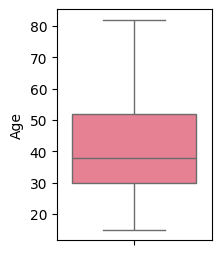

In [14]:
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(df_cleaned['Age']) #buat boxplot

terlihat pada boxplot tidak ada outlier, namun selanjutnya tetap dilakukan untuk memastikan dengan berbagai metode

In [15]:
print("\n3. HANDLING OUTLIERS")

numerical_cols = ['Age']
# Fungsi untuk mendeteksi outliers dengan berbagai metode
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, IQR

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers, z_scores

def detect_outliers_percentile(data, column, lower_percentile=1, upper_percentile=99):
    lower_bound = data[column].quantile(lower_percentile/100)
    upper_bound = data[column].quantile(upper_percentile/100)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = {}

for col in numerical_cols:
    print(f"\nOUTLIER ANALYSIS: {col.upper()}")
    print(f"Basic Statistics:")
    print(df_cleaned[col].describe())

    # Metode 1: IQR
    outliers_iqr, lower_iqr, upper_iqr, iqr = detect_outliers_iqr(df_cleaned, col)
    print(f"\nIQR Method:")
    print(f"  Q1: {df_cleaned[col].quantile(0.25):.2f}, Q3: {df_cleaned[col].quantile(0.75):.2f}")
    print(f"  IQR: {iqr:.2f}")
    print(f"  Lower bound: {lower_iqr:.2f}, Upper bound: {upper_iqr:.2f}")
    print(f"  Outliers detected: {len(outliers_iqr)} ({len(outliers_iqr)/len(df_cleaned)*100:.2f}%)")

    # Metode 2: Z-score
    outliers_zscore, z_scores = detect_outliers_zscore(df_cleaned, col, threshold=3)
    print(f"\nZ-score Method (threshold=3):")
    print(f"  Outliers detected: {len(outliers_zscore)} ({len(outliers_zscore)/len(df_cleaned)*100:.2f}%)")

    # Metode 3: Percentile
    outliers_percentile, lower_perc, upper_perc = detect_outliers_percentile(df_cleaned, col)
    print(f"\nPercentile Method (1st-99th):")
    print(f"  Lower bound: {lower_perc:.2f}, Upper bound: {upper_perc:.2f}")
    print(f"  Outliers detected: {len(outliers_percentile)} ({len(outliers_percentile)/len(df_cleaned)*100:.2f}%)")

    outlier_summary[col] = {
        'iqr_outliers': len(outliers_iqr),
        'zscore_outliers': len(outliers_zscore),
        'percentile_outliers': len(outliers_percentile),
        'outliers_iqr': outliers_iqr,
        'outliers_zscore': outliers_zscore
    }

    if len(outliers_iqr) > 0:
        print(f"  Outlier values: {sorted(outliers_iqr[col].unique())}")




3. HANDLING OUTLIERS

OUTLIER ANALYSIS: AGE
Basic Statistics:
count    364.00000
mean      41.25000
std       15.31436
min       15.00000
25%       30.00000
50%       38.00000
75%       52.00000
max       82.00000
Name: Age, dtype: float64

IQR Method:
  Q1: 30.00, Q3: 52.00
  IQR: 22.00
  Lower bound: -3.00, Upper bound: 85.00
  Outliers detected: 0 (0.00%)

Z-score Method (threshold=3):
  Outliers detected: 0 (0.00%)

Percentile Method (1st-99th):
  Lower bound: 17.63, Upper bound: 80.00
  Outliers detected: 7 (1.92%)


**Penjelasan:**  
tidak diperlukan outlier handling untuk kolom age tersebut
1. pada metode IQR:
    - Batas bawah -3 tahun: Tidak relevan secara klinis (usia tidak mungkin negatif)
    - Batas atas 85 tahun: Masuk akal untuk populasi pasien kanker tiroid
    - Semua data point berada dalam rentang -3 hingga 85 tahun
    - 0% outliers menurut metode yang paling umum digunakan
2. pada metode Z-score:
    - Z-score < 3 untuk semua observasi
    - Tidak ada data point yang secara signifikan menyimpang dari mean
    - Distribusi relatif normal tanpa nilai ekstrem
    - 0% outliers
3. pada metode Percentile:
    - ditemukan 7 outliers, Hanya 1.92% dari total dataset (7 dari 364 records)
    - Pasien usia >80 tahun yang terdeteksi sebagai outlier

<Axes: ylabel='Age'>

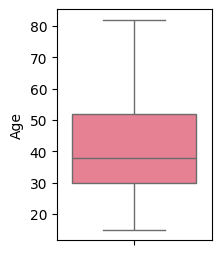

In [16]:
df_processed = df_cleaned.copy()
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(df_processed['Age']) #buat boxplot

## **Normalisasi/standarisasi kolom numerik**

In [17]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Age']

print(f"Statistik sebelum normalisasi:")
print(df_processed['Age'].describe().round(2))

print("STANDARISASI (Z-Score Normalization)")
scaler_standard = StandardScaler()

df_standardized = df_processed.copy()
df_standardized['Age_standardized'] = scaler_standard.fit_transform(df_standardized[['Age']])

print("Hasil Standarisasi (Z-Score):")
print("----------------------------")
print(f"Mean setelah standarisasi: {df_standardized['Age_standardized'].mean():.6f}")
print(f"Standard deviation setelah standarisasi: {df_standardized['Age_standardized'].std():.6f}")
print(f"Range nilai: {df_standardized['Age_standardized'].min():.2f} hingga {df_standardized['Age_standardized'].max():.2f}")

print("\n10 Record Pertama setelah Standarisasi:")
print("---------------------------------------")
print(df_standardized[['Age', 'Age_standardized']].head(10).round(4))

Statistik sebelum normalisasi:
count    364.00
mean      41.25
std       15.31
min       15.00
25%       30.00
50%       38.00
75%       52.00
max       82.00
Name: Age, dtype: float64
STANDARISASI (Z-Score Normalization)
Hasil Standarisasi (Z-Score):
----------------------------
Mean setelah standarisasi: 0.000000
Standard deviation setelah standarisasi: 1.001376
Range nilai: -1.72 hingga 2.66

10 Record Pertama setelah Standarisasi:
---------------------------------------
   Age  Age_standardized
0   27           -0.9318
1   34           -0.4741
2   30           -0.7356
3   62            1.3568
4   62            1.3568
5   52            0.7029
6   41           -0.0163
7   46            0.3106
8   51            0.6375
9   40           -0.0817


In [18]:
df_final_normalized = df_standardized.copy()
df_final_normalized.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Age_standardized
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,-0.931780
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,-0.474064
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,-0.735616
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,1.356803
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,1.356803
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No,0.702922
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,-0.016347
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,0.310593
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,0.637534
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,-0.081735


saya menggunakan standarisasi Z-Score karena keunggulannya untuk data medis dan hasil menunjukkan standarisasi berhasil optimal dengan:
- Mean ≈ 0.000000 (sangat mendekati nol)
- Std ≈ 1.001376 (sangat mendekati satu)
- Preservation of Distribution: Shape distribusi tetap sama, hanya skala yang berubah

## **Encoding kolom kategorikal**

In [19]:
categorical_analysis = {}

for col in object_columns:
    unique_count = df_final_normalized[col].nunique()
    unique_values = df_final_normalized[col].unique()
    value_counts = df_final_normalized[col].value_counts()
    missing_count = df_final_normalized[col].isnull().sum()

    categorical_analysis[col] = {
        'unique_count': unique_count,
        'unique_values': unique_values,
        'value_counts': value_counts,
        'missing_count': missing_count
    }

    print(f"\n{col}:")
    print(f"  Jumlah Label Unik: {unique_count}")
    print(f"  Nilai Unik: {list(unique_values)}")
    print(f"  Missing Values: {missing_count}")
    for value, count in value_counts.items():
        percentage = (count / len(df_final_normalized)) * 100
        print(f"    - {value}: {count} ({percentage:.2f}%)")


Gender:
  Jumlah Label Unik: 2
  Nilai Unik: ['F', 'M']
  Missing Values: 0
    - F: 293 (80.49%)
    - M: 71 (19.51%)

Smoking:
  Jumlah Label Unik: 2
  Nilai Unik: ['No', 'Yes']
  Missing Values: 0
    - No: 315 (86.54%)
    - Yes: 49 (13.46%)

Hx Smoking:
  Jumlah Label Unik: 2
  Nilai Unik: ['No', 'Yes']
  Missing Values: 0
    - No: 336 (92.31%)
    - Yes: 28 (7.69%)

Hx Radiothreapy:
  Jumlah Label Unik: 2
  Nilai Unik: ['No', 'Yes']
  Missing Values: 0
    - No: 357 (98.08%)
    - Yes: 7 (1.92%)

Thyroid Function:
  Jumlah Label Unik: 5
  Nilai Unik: ['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism']
  Missing Values: 0
    - Euthyroid: 313 (85.99%)
    - Clinical Hyperthyroidism: 20 (5.49%)
    - Subclinical Hypothyroidism: 14 (3.85%)
    - Clinical Hypothyroidism: 12 (3.30%)
    - Subclinical Hyperthyroidism: 5 (1.37%)

Physical Examination:
  Jumlah Label Unik: 5
  Nilai Unik: ['Single nodular goi

In [20]:
print("\n" + "="*30)
print("STRATEGI ENCODING")
print("="*30)

encodingStrategy = {}

for col in object_columns:
    unique_count = categorical_analysis[col]['unique_count']
    unique_values = categorical_analysis[col]['unique_values']

    if col == 'Recurred':
        strategy = "Label Encoding (Target Variable: No=0, Yes=1)"

    elif unique_count == 2 and col in ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality']:
        strategy = "One-Hot Encoding (Binary Nominal - tidak ada urutan klinis)"

    elif col == 'M':
        strategy = "Label Encoding (M0=0, M1=1) - ada urutan klinis berarti"

    elif col in ['Risk', 'T', 'N', 'Stage', 'Response']:
        if col == 'Risk':
            order = ['Low', 'Intermediate', 'High']
            mapping = "{'Low': 0, 'Intermediate': 1, 'High': 2}"
        elif col == 'T':
            order = ['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b']
            mapping = "{'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6}"
        elif col == 'N':
            order = ['N0', 'N1a', 'N1b']
            mapping = "{'N0': 0, 'N1a': 1, 'N1b': 2}"
        elif col == 'Stage':
            order = ['I', 'II', 'III', 'IVA', 'IVB']
            mapping = "{'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4}"
        elif col == 'Response':
            order = ['Excellent', 'Indeterminate', 'Biochemical Incomplete', 'Structural Incomplete']
            mapping = "{'Excellent': 0, 'Indeterminate': 1, 'Biochemical Incomplete': 2, 'Structural Incomplete': 3}"
        strategy = f"Ordinal Encoding: {order} → {mapping}"

    elif 3 <= unique_count <= 10:
        if col == 'Thyroid Function':
            strategy = "One-Hot Encoding (Kategorikal nominal - kompleksitas klinis berbeda)"
        elif col == 'Physical Examination':
            strategy = "One-Hot Encoding (Kategorikal nominal - jenis goiter berbeda)"
        elif col == 'Adenopathy':
            strategy = "One-Hot Encoding (Kategorikal nominal - lokasi berbeda bukan urutan)"
        elif col == 'Pathology':
            strategy = "One-Hot Encoding (Kategorikal nominal - subtype biologis berbeda)"
        else:
            strategy = "One-Hot Encoding (Multi-category Nominal)"

    else:
        strategy = "Frequency Encoding / Target Encoding (banyak kategori)"

    encodingStrategy[col] = strategy

for col, strategy in encodingStrategy.items():
    print(f"{col}: {strategy}")




STRATEGI ENCODING
Gender: One-Hot Encoding (Binary Nominal - tidak ada urutan klinis)
Smoking: One-Hot Encoding (Binary Nominal - tidak ada urutan klinis)
Hx Smoking: One-Hot Encoding (Binary Nominal - tidak ada urutan klinis)
Hx Radiothreapy: One-Hot Encoding (Binary Nominal - tidak ada urutan klinis)
Thyroid Function: One-Hot Encoding (Kategorikal nominal - kompleksitas klinis berbeda)
Physical Examination: One-Hot Encoding (Kategorikal nominal - jenis goiter berbeda)
Adenopathy: One-Hot Encoding (Kategorikal nominal - lokasi berbeda bukan urutan)
Pathology: One-Hot Encoding (Kategorikal nominal - subtype biologis berbeda)
Focality: One-Hot Encoding (Binary Nominal - tidak ada urutan klinis)
Risk: Ordinal Encoding: ['Low', 'Intermediate', 'High'] → {'Low': 0, 'Intermediate': 1, 'High': 2}
T: Ordinal Encoding: ['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'] → {'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6}
N: Ordinal Encoding: ['N0', 'N1a', 'N1b'] → {'N0': 0, '

**Alasan pemilihan strategi:**  
1.   kolom gender dengan nilai F dan M menggunakan One-Hot Encoding karena gender adalah variabel nominal - tidak ada urutan logis atau tingkatan antara female dan male sehingga tidak membuat asumsi ranking yang salah
2.   kolom smoking dengan nilai "no" dan "yes" menggunakan One-Hot Encoding karena merokok adalah variabel risiko klinis yang bersifat kategorikal nominal, tidak ada urutan matematis antara "yes" dan "no" tidak boleh mengasumsikan "yes" > "no" atau sebaliknya
3. Kolom Hx Smoking dengan nilai "no" dan "yes" menggunakan One-Hot Encoding karena riwayat merokok adalah variabel biner nominal dalam konteks medis
4. Kolom Focality dengan nilai 'Uni-Focal' dan 'Multi-Focal' menggunakan One-Hot Encoding karena merupakan variabel klinis nominal dimana multi-focal sering dikaitkan dengan risiko kekambuhan lebih tinggi, namun tidak ada urutan matematis yang linear antara kedua kategori.
5. Kolom M dengan nilai 'M0' dan 'M1' menggunakan Label Encoding karena meskipun binary, memiliki urutan staging yang berarti (M0 = tidak ada metastasis → M1 = ada metastasis) dan progression ini signifikan untuk prognosis kanker tiroid dimana M1 menunjukkan penyakit yang lebih lanjut/berat.
6. Kolom Risk dengan nilai 'Low', 'Intermediate', 'High' menggunakan Ordinal Encoding karena memiliki urutan yang jelas dan berarti.
7. Kolom T, N, Stage menggunakan Ordinal Encoding karena merupakan sistem staging kanker dengan progression klinis yang terdefinisi dengan baik dan urutan yang konsisten dalam literatur medis.
    - Kategori T (Tumor) dalam Kanker Tiroid:
      T1 - Tumor Kecil Terbatas pada Tiroid
      T1a: Tumor ≤ 1 cm, terbatas pada tiroid

      T1b: Tumor > 1 cm tetapi ≤ 2 cm, terbatas pada tiroid

      T2 - Tumor Sedang
      T2: Tumor > 2 cm tetapi ≤ 4 cm, terbatas pada tiroid

      T3 - Tumor Besar dengan Ekstensi Minimal
      T3a: Tumor > 4 cm, terbatas pada tiroid

      T3b: Tumor ukuran berapapun dengan ekstensi gross ke otot strap (sternohyoid, sternothyroid, atau omohyoid)
      T4 - Tumor Lanjut dengan Ekstensi Signifikan
      T4a: Tumor menginvasi struktur luar tiroid (laring, trakea, esofagus, saraf recurrent laryngeal)

      T4b: Tumor menginvasi prevertebral fascia, pembuluh darah mediastinum, atau mengelilingi arteri karotis
      sehingga urutannya:  
      T1a (paling ringan) → T1b → T2 → T3a → T3b → T4a → T4b (paling berat)
    - Kategori N  (Lymph Node) dalam Kanker Tiroid:
      N0: Tidak ada evidence metastasis ke kelenjar getah bening regional
      N1 - Ada Metastasis ke Kelenjar Getah Bening
        N1a: Metastasis ke level VI
        N1b: Metastasis ke level lain
      N0 (risiko terendah) → N1a (risiko menengah) → N1b (risiko tertinggi)
    - Kategori stage:
      Stage I: Tumor terbatas, prognosis terbaik

      Stage II: Tumor lebih besar atau metastasis jauh pada pasien muda

      Stage III: Ekstensi lokal atau metastasis kelenjar getah bening

      Stage IVA: Invasi struktur sekitaring atau metastasis kelenjar getah bening luas

      Stage IVB: Metastasis jauh, prognosis terburuk
      urutan stage:  
      Stage I → Stage II → Stage III → Stage IVA → Stage IVB
8. Kolom Response menggunakan Ordinal Encoding karena memiliki gradasi risiko kekambuhan yang sangat jelas dari Excellent → Indeterminate → Biochemical Incomplete → Structural Incomplete berdasarkan kriteria ATA (American Thyroid Association).  
    - Excellent Response: Tidak ada evidence penyakit, Risiko kekambuhan terendah (1-4%)
    - Indeterminate Response: Temuan tidak pasti, Risiko kekambuhan rendah-intermediate (15-20%)
    - Biochemical Incomplete: Bukti biokimia penyakit (Tg/TgAb abnormal), Risiko kekambuhan intermediate (20-25%)
    - Structural Incomplete: Bukti penyakit struktural pada imaging, Risiko kekambuhan tertinggi (50-85%)
9. Kolom Thyroid Function, Pathology, Physical Examination, Adenopathy menggunakan One-Hot Encoding karena merupakan variabel multi-kategori nominal tanpa urutan linear yang konsisten, masing-masing dengan karakteristik klinis yang unik dan berbeda.
10. Kolom Target Recurred dengan nilai 'Yes' dan 'No' menggunakan Label Encoding karena merupakan standard practice dalam binary classification, dengan mapping intuitif No=0, Yes=1 yang kompatibel dengan semua algoritma dan metrik evaluasi machine learning.


In [22]:
print("IMPLEMENTASI ENCODING")
print("="*50)

df_encoded = df_final_normalized.copy()

encoding_mapping = {}

print("Proses Encoding:")
print("\n1. TARGET VARIABLE - Recurred:")
print("-----------------------------")
le_target = LabelEncoder()
df_encoded['Recurred'] = le_target.fit_transform(df_encoded['Recurred'])
encoding_mapping['Recurred'] = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
print(f"   Recurred: {encoding_mapping['Recurred']}")

print("\n2. ONE-HOT ENCODING (Binary Nominal - tidak ada urutan):")
print("------------------------------------")
binary_nominal_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality']

for col in binary_nominal_columns:
    if col in df_encoded.columns:
        # one-hot encoding
        dummies = pd.get_dummies(df_encoded[col], prefix=col)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded = df_encoded.drop(col, axis=1)

        print(f"   {col}: {list(dummies.columns)}")

print("\n3. LABEL ENCODING (Binary dengan Urutan Klinis):")
print("-----------------------------------------------")
m_mapping = {'M0': 0, 'M1': 1}
df_encoded['M'] = df_encoded['M'].map(m_mapping)
encoding_mapping['M'] = m_mapping
print(f"   M: {m_mapping}")

print("\n4. ORDINAL ENCODING (Variabel dengan Urutan Klinis Jelas):")
print("--------------------------------------------------")

ordinal_mappings = {
    'Risk': {'Low': 0, 'Intermediate': 1, 'High': 2},
    'T': {'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6},
    'N': {'N0': 0, 'N1a': 1, 'N1b': 2},
    'Stage': {'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4},
    'Response': {
        'Excellent': 0,
        'Indeterminate': 1,
        'Biochemical Incomplete': 2,
        'Structural Incomplete': 3
    }
}

for col, mapping in ordinal_mappings.items():
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(mapping)
        encoding_mapping[col] = mapping
        print(f"   {col}: {mapping}")

print("\n4. ONE-HOT ENCODING (Multi-category Nominal):")
print("--------------------------------------------")
multi_nominal_columns = ['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology']

for col in multi_nominal_columns:
    if col in df_encoded.columns:
        dummies = pd.get_dummies(df_encoded[col], prefix=col)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded = df_encoded.drop(col, axis=1)

        print(f"   {col}: {len(dummies.columns)} kategori → {list(dummies.columns)}")

print("\n" + "="*50)
print("HASIL SETELAH ENCODING YANG DISESUAIKAN")
print("="*50)

print(f"Shape sebelum encoding: {df_final_normalized.shape}")
print(f"Shape setelah encoding: {df_encoded.shape}")

print(f"\nKolom sebelum encoding: {len(df_final_normalized.columns)}")
print(f"Kolom setelah encoding: {len(df_encoded.columns)}")
print(f"Penambahan kolom: {len(df_encoded.columns) - len(df_final_normalized.columns)}")

print("\nTipe data setelah encoding:")
print("---------------------------")
print(df_encoded.dtypes.value_counts())

print("\n5 Record pertama setelah encoding:")
print("----------------------------------")
print(df_encoded.head())

IMPLEMENTASI ENCODING
Proses Encoding:

1. TARGET VARIABLE - Recurred:
-----------------------------
   Recurred: {'No': np.int64(0), 'Yes': np.int64(1)}

2. ONE-HOT ENCODING (Binary Nominal - tidak ada urutan):
------------------------------------
   Gender: ['Gender_F', 'Gender_M']
   Smoking: ['Smoking_No', 'Smoking_Yes']
   Hx Smoking: ['Hx Smoking_No', 'Hx Smoking_Yes']
   Hx Radiothreapy: ['Hx Radiothreapy_No', 'Hx Radiothreapy_Yes']
   Focality: ['Focality_Multi-Focal', 'Focality_Uni-Focal']

3. LABEL ENCODING (Binary dengan Urutan Klinis):
-----------------------------------------------
   M: {'M0': 0, 'M1': 1}

4. ORDINAL ENCODING (Variabel dengan Urutan Klinis Jelas):
--------------------------------------------------
   Risk: {'Low': 0, 'Intermediate': 1, 'High': 2}
   T: {'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6}
   N: {'N0': 0, 'N1a': 1, 'N1b': 2}
   Stage: {'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4}
   Response: {'Excellent': 0, 'Indetermina

## **Feature Engineering**

In [51]:
print("FEATURE ENGINEERING: THYROID CANCER AGGRESSIVENESS SCORE")
print("=" * 60)
df_final = df_encoded.copy()
df_final['High_Risk_Age'] = (df_final['Age'] > 55).astype(int)
print(f"Shape sebelum penambahan Aggressiveness Score: {df_final.shape}")
# berdasarkan evidence-based weighting dari literature thyroid cancer
print("Komponen dan Weighting Aggressiveness Score:")
print("--------------------------------------------")
# komponen 1: Tumor Size (T stage) - Weight 2
print("1. Tumor Size (T stage) - Weight: 2")
t_component = df_final['T'] * 2
print(f"   Range: {t_component.min()} - {t_component.max()}")
# komponen 2: Nodal Involvement (N stage) - Weight 3
print("2. Nodal Involvement (N stage) - Weight: 3")
n_component = df_final['N'] * 3
print(f"   Range: {n_component.min()} - {n_component.max()}")
# komponen 3: Metastasis (M stage) - Weight 5
print("3. Metastasis (M stage) - Weight: 5")
m_component = df_final['M'] * 5
print(f"   Range: {m_component.min()} - {m_component.max()}")
# komponen 4: Risk Category - Weight 2
print("4. Risk Category - Weight: 2")
risk_component = df_final['Risk'] * 2
print(f"   Range: {risk_component.min()} - {risk_component.max()}")
# komponen 5: High Risk Age (>55 tahun) - Weight 2
print("5. High Risk Age (>55 tahun) - Weight: 2")
age_component = df_final['High_Risk_Age'] * 2
print(f"   Range: {age_component.min()} - {age_component.max()}")
# total Aggressiveness Score
df_final['Aggressiveness_Score'] = (
    t_component +
    n_component +
    m_component +
    risk_component +
    age_component
)

print(f"   Score Range: {df_final['Aggressiveness_Score'].min()} - {df_final['Aggressiveness_Score'].max()}")

print("\n" + "="*50)
print("ANALISIS PERFORMANCE AGGRESSIVENESS SCORE")
print("="*50)

# hitung korelasi dengan target
aggressiveness_corr = df_final['Aggressiveness_Score'].corr(df_final['Recurred'])
print(f"Korelasi Aggressiveness Score dengan Recurrence: {aggressiveness_corr:.4f}")

# bandingkan dengan komponen individual
print("\nKorelasi dengan Recurrence - Perbandingan:")
print("-----------------------------------------")
individual_correlations = {}
for component in ['T', 'N', 'M', 'Risk', 'High_Risk_Age', 'Aggressiveness_Score']:
    corr = df_final[component].corr(df_final['Recurred'])
    individual_correlations[component] = corr
    print(f"   {component:20}: {corr:7.4f}")

baseline_corr = max([individual_correlations['T'], individual_correlations['N'],
                     individual_correlations['M'], individual_correlations['Risk']])
improvement = aggressiveness_corr - baseline_corr
improvement_pct = (improvement / baseline_corr) * 100

print("\n" + "="*50)
print("ANALISIS UTILITY KLINIS")
print("="*50)

high_risk_recurrence_rate = high_risk_group['Recurred'].mean() * 100
high_risk_sensitivity = len(high_risk_group[high_risk_group['Recurred'] == 1]) / len(df_final[df_final['Recurred'] == 1]) * 100

print(f"Utility Klinis Aggressiveness Score:")
print(f"   • High Risk Group: {len(high_risk_group)} pasien")
print(f"   • Recurrence Rate in High Risk: {high_risk_recurrence_rate:.1f}%")
print(f"   • Sensitivity: {high_risk_sensitivity:.1f}% of recurrences captured in High Risk group")


FEATURE ENGINEERING: THYROID CANCER AGGRESSIVENESS SCORE
Shape sebelum penambahan Aggressiveness Score: (364, 40)
Komponen dan Weighting Aggressiveness Score:
--------------------------------------------
1. Tumor Size (T stage) - Weight: 2
   Range: 0 - 12
2. Nodal Involvement (N stage) - Weight: 3
   Range: 0 - 6
3. Metastasis (M stage) - Weight: 5
   Range: 0 - 5
4. Risk Category - Weight: 2
   Range: 0 - 4
5. High Risk Age (>55 tahun) - Weight: 2
   Range: 0 - 2
   Score Range: 0 - 29

ANALISIS PERFORMANCE AGGRESSIVENESS SCORE
Korelasi Aggressiveness Score dengan Recurrence: 0.7370

Korelasi dengan Recurrence - Perbandingan:
-----------------------------------------
   T                   :  0.5533
   N                   :  0.6245
   M                   :  0.3512
   Risk                :  0.7274
   High_Risk_Age       :  0.3145
   Aggressiveness_Score:  0.7370

ANALISIS UTILITY KLINIS
Utility Klinis Aggressiveness Score:
   • High Risk Group: 56 pasien
   • Recurrence Rate in High R

# **Feature Engineering: Thyroid Cancer Aggressiveness Score**
## **Alasan**
- Menggabungkan faktor prognosis terpisah menjadi satu metrik terpadu
- Memungkinkan pengelompokan pasien berdasarkan profil risiko komprehensif  
  contoh pemanfaatan:  

  Risk Category (Original): Low/Intermediate/High (3 kategori)  
  Aggressiveness Score: 0-29 (30 level granularitas)    

  **jika adanya aggressiveness score:**  
  *"Dr. Smith melihat chart: Aggressiveness Score 18 → 'Ini high risk, schedule USG 3 bulan, thyroglobulin check, mungkin perlu diskusi multidisciplinary team'"*  

  **jika menggunakan staging biasa:**  
  *"Dr. Smith melihat: T3, N1, M0, High Risk, Age>55 → harus berpikir: 'T3 itu signifikan, N1 juga penting, M0 bagus, Risk high concerning, Age>55 tambah concern...'"*

## **Metode untuk Formulasi Skor**
### **Evidence-Based Weighting**
Berdasarkan literature thyroid cancer, ditetapkan weighting sebagai berikut:
```
Aggressiveness_Score = (T × 2) + (N × 3) + (M × 5) + (Risk × 2) + (High_Risk_Age × 2)
```
### **Kategori Risiko**
- **Low**: 0-4 (Recurrence rate: 2.5%)
- **Low-Intermediate**: 5-8 (Recurrence rate: 16.0%)
- **High-Intermediate**: 9-12 (Recurrence rate: 40.4%)
- **High**: 13-29 (Recurrence rate: 89.3%)

## **Hasil dan Performa**
- **Rentang Skor**: 0 - 29
- **Korelasi dengan Recurrence**: 0.7370

## **Kelebihan Fitur**
- Menggabungkan multiple faktor dalam satu metrik

## **Splitting Data**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X = df_final.drop('Recurred', axis=1)
y = df_final['Recurred']

print(f"Shape features (X): {X.shape}")
print(f"Shape target (y): {y.shape}")

print(f"\nDistribusi Target Variable:")
print(f"   No Recurrence (0): {sum(y == 0)} ({sum(y == 0)/len(y)*100:.1f}%)")
print(f"   Recurrence (1): {sum(y == 1)} ({sum(y == 1)/len(y)*100:.1f}%)")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
    shuffle=True
)

print("Hasil Splitting:")
print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

train_recurrence_rate = y_train.mean() * 100
train_class_0 = sum(y_train == 0)
train_class_1 = sum(y_train == 1)

print("Training Set Distribution:")
print(f"   No Recurrence (0): {train_class_0} ({train_class_0/len(y_train)*100:.1f}%)")
print(f"   Recurrence (1): {train_class_1} ({train_class_1/len(y_train)*100:.1f}%)")
print(f"   Overall recurrence rate: {train_recurrence_rate:.1f}%")

test_recurrence_rate = y_test.mean() * 100
test_class_0 = sum(y_test == 0)
test_class_1 = sum(y_test == 1)

print("\nTesting Set Distribution:")
print(f"   No Recurrence (0): {test_class_0} ({test_class_0/len(y_test)*100:.1f}%)")
print(f"   Recurrence (1): {test_class_1} ({test_class_1/len(y_test)*100:.1f}%)")
print(f"   Overall recurrence rate: {test_recurrence_rate:.1f}%")

train_df = X_train.copy()
train_df['Recurred'] = y_train

test_df = X_test.copy()
test_df['Recurred'] = y_test

Shape features (X): (364, 40)
Shape target (y): (364,)

Distribusi Target Variable:
   No Recurrence (0): 256 (70.3%)
   Recurrence (1): 108 (29.7%)
Hasil Splitting:
   Training set: 291 samples (79.9%)
   Testing set:  73 samples (20.1%)
Training Set Distribution:
   No Recurrence (0): 205 (70.4%)
   Recurrence (1): 86 (29.6%)
   Overall recurrence rate: 29.6%

Testing Set Distribution:
   No Recurrence (0): 51 (69.9%)
   Recurrence (1): 22 (30.1%)
   Overall recurrence rate: 30.1%
